In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("/Users/vishalbarad/Desktop/Python/ML/AUC_ROC_PR_curve/diabetes.csv")

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [7]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [8]:
from sklearn.linear_model import LogisticRegression

In [9]:
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [10]:
y_predict = model.predict(X_test)

In [11]:
from sklearn.metrics import roc_curve,auc

In [12]:
fpr, tpr, thresholds = roc_curve(y_test,y_predict)

In [13]:
auc(fpr,tpr)

0.7915384615384616

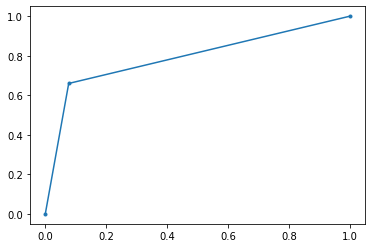

In [14]:
plt.plot(fpr,tpr,linestyle='-',marker='.')

In [15]:
thresholds

array([2, 1, 0])

In [16]:
from sklearn.metrics import precision_recall_curve

In [17]:
precision, recall, thresholds = precision_recall_curve(y_test,y_predict)

In [18]:
thresholds

array([0, 1])

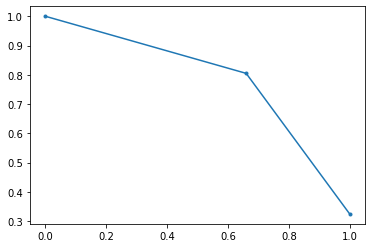

In [19]:
plt.plot(recall,precision,linestyle='-',marker='.')